In [0]:
import glob
import os
import pandas as pd
import numpy as np
import h5py
import cv2
import matplotlib.pyplot as plt

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [0]:
images_train_path = '/content/drive/My Drive/training-a/*.png'
hdf5_path = '/content/drive/My Drive/training-a.h5' 
train_addrs = glob.glob(images_train_path)
print(train_addrs[23])

/content/drive/My Drive/training-a/a18725.png


In [0]:
def get_key(path):
    # seperates the key of an image from the filepath
    key=path.split(sep=os.sep)[-1]
    return key
df = pd.read_csv('/content/drive/My Drive/training-a.csv')
df = df.set_index('filename')
y_label=[df.loc[get_key(path)]['digit'] for path in  train_addrs]

In [0]:
#data_order = 'tf'
train_shape = (len(train_addrs), 224, 224, 3)
hdf5_file = h5py.File(hdf5_path, mode='w')
hdf5_file.create_dataset("train_img", train_shape, np.int8)
hdf5_file.create_dataset("train_labels", (len(train_addrs),), np.int8)
hdf5_file["train_labels"][...] = train_labels

In [0]:
for i in range(len(train_addrs)):
    # print how many images are saved every 1000 images
    if i % 1000 == 0 and i > 1:
        print('Train data: {}/{}'.format(i, len(train_addrs)))
    # read an image and resize to (224, 224)
    # cv2 load images as BGR, convert it to RGB
    addr = train_addrs[i]
    img = cv2.imread(addr)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hdf5_file["train_img"][i, ...] = img[None]
hdf5_file.close()

In [0]:
def load_dataset():
  train_dataset = h5py.File('/content/drive/My Drive/training-a.h5',"r")
  train_set_x_orig = np.array(train_dataset["train_img"][:]) # train set features
  return train_set_x_orig

In [0]:
X_train_orig = load_dataset()

9


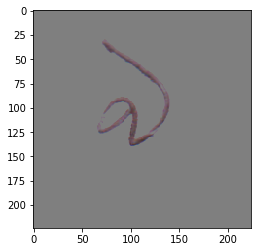

In [0]:
plt.imshow(X_train_orig[12222])
print(y_label[12222])
